#Classification
Authors: Gustavo FLEURY && Induraj RAMAMURTHY

Project: https://github.com/gustavofleury/Audit_Reports_NLP

1. Train/Test Datasets
2. Normalization
3. Features Extraction (TF-IDF, W2V, FastText, GloVe)
4. Model Training (Classical ML: Naïve Bayes, , Logistic Regression, SVM, Random Forest, NN)
5. Model Prediction/Evaluation

In [0]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3MB 36kB/s 
     |████████████████████████████████| 512kB 44.3MB/s 
     |████████████████████████████████| 3.8MB 41.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=16f27af1bf424bbad6d00385ac30bbb47e1b4707dbfb66417df52106cb35db5d
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc

In [0]:
#Take Files From GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Paths
DATASETS_FOLDER = '/content/drive/My Drive/Research/DataSets/'
# DF_PARSED_LABELS = DATASETS_FOLDER + 'DF_ReportsInColumnsLABEL_v20.01.29.pkl'
# DF_PARSED_LABELS = DATASETS_FOLDER + 'DF_ReportsInColumnsLABEL_v20.01.29bte2015.pkl'  #Filtered >= 2015
# DF_PARSED_LABELS = DATASETS_FOLDER + 'DF_ReportsInColumnsLABEL_v20.01.29bte2016.pkl'  #Filtered >= 2016
# DF_PARSED_LABELS = DATASETS_FOLDER + 'DF_ReportsInColumnsLABEL_v20.01.29bte2017.pkl'  #Filtered >= 2017
# DF_PARSED_LABELS = DATASETS_FOLDER + 'DF_ReportsInColumnsLABEL_v20.01.29bte2018.pkl'  #Filtered >= 2018
# DF_PARSED_LABELS = DATASETS_FOLDER + 'DF_ReportsInColumnsLABEL_v20.01.29bte2019.pkl'  #Filtered >= 2019

DF_PARSED_LABELS = DATASETS_FOLDER + '2016_DF_cleaned_not_balanced.pkl'  #Filtered >= 2016 INDU REGEX CLEAN

In [0]:
#Run Functions from another Jupyter Notebook
%run '/content/drive/My Drive/Colab Notebooks/NLP-4-Classification-FUNCTIONS.ipynb'


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
#Import FILES
#Reports already Parsed and in columns
df=pd.read_pickle(DF_PARSED_LABELS)

Original - Total:  18435  HIGH:  631  Percentage:  0.03422836994846759


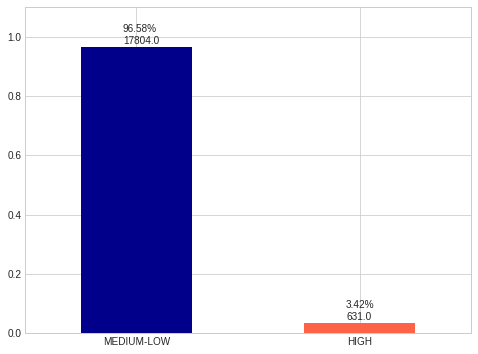

In [0]:
# Show RISK Count
def plotStats(dfp):
  print("Original - Total: ", len(dfp), " HIGH: ", len(dfp[ (dfp['RISK'] == "HIGH") ]) , " Percentage: ", len(dfp[ (dfp['RISK'] == "HIGH") ])/len(dfp))
  style.use('seaborn-whitegrid')
  ax = dfp['RISK'].value_counts(normalize=True).plot(kind='bar', rot=0, color=['darkblue','tomato'], figsize=(8,6))
  ax.set_ylim(0,1.1)
  for p in ax.patches:
      ax.annotate(str(round(p.get_height()*len(dfp),0)), (p.get_x() + 0.19, p.get_height() + 0.01))
      ax.annotate(str(round(p.get_height()*100,2))+'%', (p.get_x() + 0.19, p.get_height() + 0.05))

plotStats(df)

In [0]:
# Example of RemoveStopWords Result
# Original
print( df.ConstText[0][:110] )
# Cleaned
print( df.sent_token_final[0][:87] )

a unidade nao apresentou a totalidade da documentacao mencionada no art. 13, iii da instrucao normativa tcu 63
unidade nao apresentou totalidade documentacao mencionada art . instrucao normativa tcu


#1. Train/Test Datasets

In [0]:
# Corpus
# corpus=df.ConstText.to_list()
corpus=df.sent_token_final.to_list()

# Labels 
labels=df.RISK.to_list()

In [0]:
# #Tokenize in SENTENCES the Corpus - And maintain the label

# from nltk.tokenize import sent_tokenize
# import nltk
# nltk.download('punkt')

# # Make lines with few words to be possible to put in ML algorithms.
# corpusSetence=[]
# labelsSetence=[]
# for x in range(0,len(corpus)):
#   setences = sent_tokenize(corpus[x])
#   corpusSetence.append(setences)
#   labelsSetence.append( [labels[x] for i in range(0,len(setences))] )

# #Flat the list
# corpusSetence = [item for sublist in corpusSetence for item in sublist]
# labelsSetence = [item for sublist in labelsSetence for item in sublist]

In [0]:
# print("Number of Sentences: ", len(corpusSetence), " Labels: ", len(labelsSetence))
# print("Max size of Sentence: ", len ( max(corpusSetence,key=len) ))
# corpus = corpusSetence
# labels = labelsSetence

In [0]:
# from sklearn.model_selection  import train_test_split
train_corpus, test_corpus, train_Labels, test_Labels = train_test_split(corpus, labels, 
                                                    test_size=0.33,
                                                    random_state=123)

print("TRAIN - Size Corpus: ", len(train_corpus), " Size Labels: ", len(train_Labels), "HIGH: ", train_Labels.count("HIGH"), " %: ", train_Labels.count("HIGH")*100/len(train_Labels)  )
print("TEST  - Size Corpus: ", len(test_corpus), " Size Labels: ", len(test_Labels), "HIGH: ", test_Labels.count("HIGH"), " %: ", test_Labels.count("HIGH")*100/len(test_Labels)  )

TRAIN - Size Corpus:  12351  Size Labels:  12351 HIGH:  435  %:  3.5219820257469032
TEST  - Size Corpus:  6084  Size Labels:  6084 HIGH:  196  %:  3.2215647600262987


In [0]:
train_Labels_Ori = train_Labels

In [0]:
#OVERSAMPLING HIGH RISKs
train_corpus, train_Labels = overSamplingRISKs(train_corpus, train_Labels)
# test_corpus, test_Labels = overSamplingRISKs(test_corpus, test_Labels)

print("TRAIN - Size Corpus: ", len(train_corpus), " Size Labels: ", len(train_Labels), "HIGH: ", train_Labels.count("HIGH"), " %: ", train_Labels.count("HIGH")*100/len(train_Labels)  )
print("TEST  - Size Corpus: ", len(test_corpus), " Size Labels: ", len(test_Labels), "HIGH: ", test_Labels.count("HIGH"), " %: ", test_Labels.count("HIGH")*100/len(test_Labels)  )

MEDIUM-LOW    11916
HIGH           5107
Name: RISK, dtype: int64
TRAIN - Size Corpus:  17023  Size Labels:  17023 HIGH:  5107  %:  30.00058744052165
TEST  - Size Corpus:  6084  Size Labels:  6084 HIGH:  196  %:  3.2215647600262987


Original - Total:  12351  HIGH:  435  Percentage:  0.03521982025746903


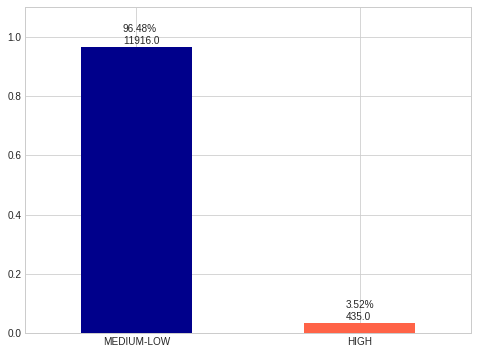

In [0]:
df_train_ori = pd.DataFrame(train_Labels_Ori, columns=['RISK'])
plotStats(df_train_ori)

Original - Total:  17023  HIGH:  5107  Percentage:  0.3000058744052165


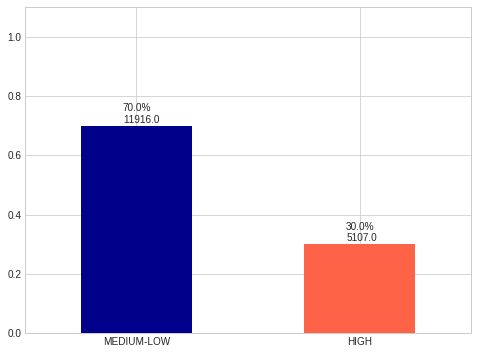

In [0]:
df_train_oversampled = pd.DataFrame(train_Labels, columns=['RISK'])
plotStats(df_train_oversampled)

#2. Tokenization and Normalization

In [0]:
NUMBER_OF_WORDS = 500 # If zero, do for all words in corpus.
#TRAIN
corpus_token=normalize_token_corpus(train_corpus, stem=False, tokenize=False, nbWords=NUMBER_OF_WORDS)
# corpus_token_Stem=normalize_token_corpus(train_corpus, stem=True, tokenize=False)
corpus_token_w2v=normalize_token_corpus(train_corpus, stem=False, tokenize=True, nbWords=NUMBER_OF_WORDS)

#TEST
corpus_token_TEST=normalize_token_corpus(test_corpus, stem=False, tokenize=False, nbWords=NUMBER_OF_WORDS)
# corpus_token_Stem_TEST=normalize_token_corpus(test_corpus, stem=True, tokenize=False)
corpus_token_w2v_TEST=normalize_token_corpus(test_corpus, stem=False, tokenize=True, nbWords=NUMBER_OF_WORDS)


In [0]:
#FAST TEXT
#Load Model
ft_model = fasttext.load_model(DATASETS_FOLDER + 'wiki.pt.bin')

#
feature_matrix_TRAIN_ft = applyModel(ft_model, corpus_token_w2v)
feature_matrix_TEST_ft = applyModel(ft_model, corpus_token_w2v_TEST)

feature_matrix_TRAIN_ft2, train_Labels_ft = clean_features_W2V( feature_matrix_TRAIN_ft, train_Labels)
feature_matrix_TEST_ft2, test_Labels_ft = clean_features_W2V(feature_matrix_TEST_ft, test_Labels)

train_Labels_ft = binarize_Label_Organize(train_Labels)
test_Labels_ft = binarize_Label_Organize(test_Labels)

In [0]:
# TF_IDF
# What is the best NGRAM size?  (For classification from 1 to 3, after get worst.)
# https://pdfs.semanticscholar.org/3a78/f7b0e17f8aa226561c02a66ee0b8695a2106.pdf

# C_MIN_DF, C_MAX_DF = 0.24, 0.85
# C_MIN_DF, C_MAX_DF, C_RANGE = 0.24, 0.85, (1,2) #Use Small values, it the computer struggles.
# C_MIN_DF, C_MAX_DF, C_RANGE = 0.0, 1.0, (1,3)

# vectorizer, feature_matrix_TFIDF_TRAIN = tf_idf(corpus_token,
#                                     min_df=C_MIN_DF, 
#                                     max_df=C_MAX_DF,
#                                     ngram_range=C_RANGE )


# vectorizer, feature_matrix_TFIDF_TEST = tf_idf(corpus_token_TEST,
#                                     min_df=C_MIN_DF, 
#                                     max_df=C_MAX_DF,
#                                     ngram_range=C_RANGE )


vectorizer, feature_matrix_TFIDF_TRAIN  = feature_engineering('tf_idf',corpus_token,1,1,1,1,dimension_reduction=True,reduction_method='tsne')
vectorizer, feature_matrix_TFIDF_TEST   = feature_engineering('tf_idf',corpus_token_TEST,1,1,1,1,dimension_reduction=True,reduction_method='tsne')

pickle.dump( feature_matrix_TFIDF_TRAIN, open( DATASETS_FOLDER + "feature_matrix_TFIDF_TRAIN_2016.pkl", "wb" ) )
pickle.dump( feature_matrix_TFIDF_TEST, open( DATASETS_FOLDER + "feature_matrix_TFIDF_TEST_2016.pkl", "wb" ) )


train_Labels_TFIDF = binarize_Label_Organize(train_Labels)
test_Labels_TFIDF = binarize_Label_Organize(test_Labels)

print("Done!")

Done!


In [0]:
pickle.dump( feature_matrix_TFIDF_TRAIN, open( DATASETS_FOLDER + "feature_matrix_TFIDF_TRAIN_2016.pkl", "wb" ) )
pickle.dump( feature_matrix_TFIDF_TEST, open( DATASETS_FOLDER + "feature_matrix_TFIDF_TEST_2016.pkl", "wb" ) )

# #LOAD TF_IDF:
# with open(DATASETS_FOLDER +'feature_matrix_TFIDF_TRAIN.p', 'wb') as handle:
#     glove_model = pickle.load(handle)

In [0]:
# Word2Vector MODEL
w2v_model = w2v_createModel(corpus_token_w2v)
# len(w2v_model['testes'])
# len(w2v_model.wv.vocab)

In [0]:
#FEATURES - W2V
feature_matrix_TRAIN = w2v_applyModel(w2v_model, corpus_token_w2v)
feature_matrix_TEST = w2v_applyModel(w2v_model, corpus_token_w2v_TEST)

#Clear Features: 
#Delete features with vector iqual to ZERO
feature_matrix_TRAIN_w2v, train_Labels_w2v = clean_features_W2V(feature_matrix_TRAIN, train_Labels)
feature_matrix_TEST_w2v, test_Labels_w2v = clean_features_W2V(feature_matrix_TEST, test_Labels)

#Label Binarize the LABELS
train_Labels_w2v = binarize_Label_Organize(train_Labels_w2v)
test_Labels_w2v = binarize_Label_Organize(test_Labels_w2v)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


Length Original:  23622  New Length:  23622
Length Original:  6028  New Length:  6028


In [0]:
# Word2Vector - Average
feature_matrix_TRAIN_w2vA = averaged_word_vectorizer(corpus=corpus_token_w2v, model=w2v_model, num_features=500)
feature_matrix_TEST_w2vA  = averaged_word_vectorizer(corpus=corpus_token_w2v_TEST, model=w2v_model, num_features=500)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [0]:

#Clear Features: 
#Delete features with vector iqual to ZERO
feature_matrix_TRAIN_w2vA, train_Labels_w2vA = clean_features_W2V(feature_matrix_TRAIN_w2vA, train_Labels)
feature_matrix_TEST_w2vA, test_Labels_w2vA = clean_features_W2V(feature_matrix_TEST_w2vA, test_Labels)

#Label Binarize the LABELS
train_Labels_w2vA = binarize_Label_Organize(train_Labels_w2vA)
test_Labels_w2vA = binarize_Label_Organize(test_Labels_w2vA)

Length Original:  23832  New Length:  23832
Length Original:  6084  New Length:  6084


In [0]:
#FAST TEXT
#Load Model
ft_model = fasttext.load_model(DATASETS_FOLDER + 'wiki.pt.bin')


In [0]:
#
feature_matrix_TRAIN_ft = applyModel(ft_model, corpus_token_w2v)
feature_matrix_TEST_ft = applyModel(ft_model, corpus_token_w2v_TEST)

feature_matrix_TRAIN_ft2, train_Labels_ft = clean_features_W2V( feature_matrix_TRAIN_ft, train_Labels)
feature_matrix_TEST_ft2, test_Labels_ft = clean_features_W2V(feature_matrix_TEST_ft, test_Labels)

train_Labels_ft = binarize_Label_Organize(train_Labels)
test_Labels_ft = binarize_Label_Organize(test_Labels)

In [0]:
#GLOVE

# Create
# createGloveDict(txtFile=DATASETS_FOLDER + "glove_s300.txt", resultFile=DATASETS_FOLDER +'GloveDict.pkl'): 
  
#LOAD GloveDict
with open(DATASETS_FOLDER +'GloveDict.pkl', 'rb') as handle:
    glove_model = pickle.load(handle)

In [0]:
#
feature_matrix_TRAIN_glove = applyModel(glove_model, corpus_token_w2v)
feature_matrix_TEST_glove = applyModel(glove_model, corpus_token_w2v_TEST)


In [0]:

feature_matrix_TRAIN_glove, train_Labels_glove = clean_features_W2V( feature_matrix_TRAIN_glove, train_Labels)
feature_matrix_TEST_glove, test_Labels_glove = clean_features_W2V(feature_matrix_TEST_glove, test_Labels)



Length Original:  16872  New Length:  16872
Length Original:  6026  New Length:  6026


In [0]:

train_Labels_glove = binarize_Label_Organize(train_Labels_glove)
test_Labels_glove = binarize_Label_Organize(test_Labels_glove)


#Train Model

In [0]:
df_ML_TFIDF = collect_Metrics_ML_Models('TF-IDF',feature_matrix_TFIDF_TRAIN, train_Labels_TFIDF, feature_matrix_TFIDF_TEST, test_Labels_TFIDF)

Naive Bayes:
Accuracy: 0.51  Precision: 0.51  Recall: 0.52  F1 Score: 0.51
Accuracy: 0.48  Precision: 0.03  Recall: 0.55  F1 Score: 0.06
Logistic Regression:
Accuracy: 0.51  Precision: 0.51  Recall: 0.54  F1 Score: 0.53
Accuracy: 0.51  Precision: 0.03  Recall: 0.49  F1 Score: 0.06
SVM:
Accuracy: 0.61  Precision: 0.58  Recall: 0.79  F1 Score: 0.67
Accuracy: 0.44  Precision: 0.03  Recall: 0.55  F1 Score: 0.06
RandomForest:
Accuracy: 1.0  Precision: 1.0  Recall: 1.0  F1 Score: 1.0
Accuracy: 0.8  Precision: 0.04  Recall: 0.21  F1 Score: 0.06
NN: 
Accuracy: 0.99  Precision: 0.99  Recall: 1.0  F1 Score: 0.99
Accuracy: 0.8  Precision: 0.04  Recall: 0.21  F1 Score: 0.06


In [0]:
df_ML_w2v = collect_Metrics_ML_Models('Word2Vector', feature_matrix_TRAIN_w2v, train_Labels_w2v, feature_matrix_TEST_w2v, test_Labels_w2v)

Naive Bayes:
Accuracy: 0.66  Precision: 0.68  Recall: 0.59  F1 Score: 0.63
Accuracy: 0.7  Precision: 0.06  Recall: 0.61  F1 Score: 0.11
Logistic Regression:
Accuracy: 0.94  Precision: 0.91  Recall: 0.97  F1 Score: 0.94
Accuracy: 0.88  Precision: 0.13  Recall: 0.48  F1 Score: 0.21
SVM:
Accuracy: 0.94  Precision: 0.91  Recall: 0.98  F1 Score: 0.95
Accuracy: 0.88  Precision: 0.13  Recall: 0.51  F1 Score: 0.21
RandomForest:
Accuracy: 1.0  Precision: 1.0  Recall: 1.0  F1 Score: 1.0
Accuracy: 0.97  Precision: 0.52  Recall: 0.11  F1 Score: 0.18
NN: 
Accuracy: 0.99  Precision: 0.98  Recall: 1.0  F1 Score: 0.99
Accuracy: 0.94  Precision: 0.23  Recall: 0.33  F1 Score: 0.27


In [0]:
df_ML_w2vA = collect_Metrics_ML_Models('AVG-Word2Vector', feature_matrix_TRAIN_w2vA, train_Labels_w2vA, feature_matrix_TEST_w2vA, test_Labels_w2vA)

Naive Bayes:
Accuracy: 0.66  Precision: 0.68  Recall: 0.58  F1 Score: 0.63
Accuracy: 0.7  Precision: 0.06  Recall: 0.6  F1 Score: 0.11
Logistic Regression:
Accuracy: 0.93  Precision: 0.9  Recall: 0.96  F1 Score: 0.93
Accuracy: 0.87  Precision: 0.13  Recall: 0.51  F1 Score: 0.2
SVM:
Accuracy: 0.93  Precision: 0.9  Recall: 0.97  F1 Score: 0.93
Accuracy: 0.86  Precision: 0.12  Recall: 0.52  F1 Score: 0.19
RandomForest:
Accuracy: 0.99  Precision: 0.99  Recall: 1.0  F1 Score: 0.99
Accuracy: 0.96  Precision: 0.28  Recall: 0.14  F1 Score: 0.18
NN: 
Accuracy: 0.99  Precision: 0.97  Recall: 1.0  F1 Score: 0.99
Accuracy: 0.93  Precision: 0.19  Recall: 0.35  F1 Score: 0.24


In [0]:
df_ML_ft = collect_Metrics_ML_Models('FastText', feature_matrix_TRAIN_ft, train_Labels_ft, feature_matrix_TEST_ft, test_Labels_ft)

Naive Bayes:
Accuracy: 0.71  Precision: 0.93  Recall: 0.05  F1 Score: 0.1
Accuracy: 0.97  Precision: 0.6  Recall: 0.02  F1 Score: 0.03
Logistic Regression:
Accuracy: 0.8  Precision: 0.81  Recall: 0.45  F1 Score: 0.57
Accuracy: 0.93  Precision: 0.16  Recall: 0.3  F1 Score: 0.21
SVM:
Accuracy: 0.82  Precision: 0.85  Recall: 0.47  F1 Score: 0.61
Accuracy: 0.94  Precision: 0.19  Recall: 0.32  F1 Score: 0.24
RandomForest:
Accuracy: 1.0  Precision: 1.0  Recall: 1.0  F1 Score: 1.0
Accuracy: 0.97  Precision: 0.52  Recall: 0.12  F1 Score: 0.2
NN: 
Accuracy: 0.7  Precision: 0.0  Recall: 0.0  F1 Score: 0.0
Accuracy: 0.97  Precision: 0.0  Recall: 0.0  F1 Score: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
df_ML_ft = collect_Metrics_ML_Models('GLOVE', feature_matrix_TRAIN_glove, train_Labels_glove, feature_matrix_TEST_glove, test_Labels_glove)

Naive Bayes:
Accuracy: 0.7  Precision: 0.94  Recall: 0.01  F1 Score: 0.03
Accuracy: 0.97  Precision: 0.32  Recall: 0.03  F1 Score: 0.06
Logistic Regression:
Accuracy: 0.8  Precision: 0.79  Recall: 0.47  F1 Score: 0.59
Accuracy: 0.92  Precision: 0.15  Recall: 0.32  F1 Score: 0.21
SVM:
Accuracy: 0.82  Precision: 0.81  Recall: 0.52  F1 Score: 0.63
Accuracy: 0.92  Precision: 0.15  Recall: 0.3  F1 Score: 0.2
RandomForest:
Accuracy: 1.0  Precision: 1.0  Recall: 1.0  F1 Score: 1.0
Accuracy: 0.97  Precision: 0.55  Recall: 0.12  F1 Score: 0.2
NN: 
Accuracy: 0.86  Precision: 0.78  Recall: 0.75  F1 Score: 0.77
Accuracy: 0.88  Precision: 0.11  Recall: 0.39  F1 Score: 0.17


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# CONFUSION MATRIX 
TF-IDF - Random Forest

In [0]:
#RandomForest
rfc = RandomForestClassifier(n_estimators=10)
print('RandomForest:')
df_ML_TFIDF = collect_Metrics_ML_Models('TF-IDF',feature_matrix_TFIDF_TRAIN, train_Labels_TFIDF, feature_matrix_TFIDF_TEST, test_Labels_TFIDF)
rfc.fit(feature_matrix_TFIDF_TRAIN, train_Labels_TFIDF) 
predictions = rfc.predict(feature_matrix_TFIDF_TEST) 
metrics.confusion_matrix(test_Labels_TFIDF,predictions)


RandomForest:
Naive Bayes:
Accuracy: 0.7  Precision: 0.0  Recall: 0.0  F1 Score: 0.0
Accuracy: 0.97  Precision: 0.0  Recall: 0.0  F1 Score: 0.0
Logistic Regression:
Accuracy: 0.7  Precision: 0.0  Recall: 0.0  F1 Score: 0.0
Accuracy: 0.97  Precision: 0.0  Recall: 0.0  F1 Score:

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined a

 0.0
SVM:
Accuracy: 0.69  Precision: 0.0  Recall: 0.0  F1 Score: 0.0
Accuracy: 0.91  Precision: 0.05  Recall: 0.09  F1 Score: 0.06
RandomForest:
Accuracy: 1.0  Precision: 1.0  Recall: 0.99  F1 Score: 1.0
Accuracy: 0.78  Precision: 0.04  Recall: 0.26  F1 Score: 0.07
NN: 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy: 0.99  Precision: 0.97  Recall: 0.99  F1 Score: 0.98
Accuracy: 0.78  Precision: 0.04  Recall: 0.26  F1 Score: 0.07


array([[4714, 1174],
       [ 145,   51]])

In [0]:
predictions

array([1, 1, 1, ..., 0, 0, 1])

In [0]:
np.array(test_Labels_TFIDF)

array([1, 0, 0, ..., 0, 1, 0])

In [0]:
a = predictions
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{0: 4859, 1: 1225}

In [0]:
a = np.array(test_Labels_TFIDF)
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{0: 5888, 1: 196}

In [0]:
len(predictions)

6084

In [0]:
5888/6084

0.967784352399737

In [0]:
1225/6084

0.20134779750164367

#CNN

In [0]:
from __future__ import division, print_function
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding, MaxPool1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import text

In [0]:
TRAIN_CORPUS = train_corpus
# TRAIN_LABELS = train_Labels
TRAIN_LABELS = np.asarray([1 if x=='HIGH' else 0 for x in train_Labels])

TEST_CORPUS = test_corpus
# TEST_LABELS = test_Labels
TEST_LABELS = np.asarray([1 if x=='HIGH' else 0 for x in test_Labels])

label_names = ['Risk_HIGH', 'Risk_MEDIUM-LOW']

MODEL = glove_model

MAX_SEQUENCE_LENGTH = 5000
EMBEDDING_DIM = 300


In [0]:
len(train_Labels)
# len(train_corpus)

17023

In [0]:

tokenizer= text.Tokenizer(num_words=MAX_SEQUENCE_LENGTH)
tokenizer.fit_on_texts(TRAIN_CORPUS)
training_sequences = tokenizer.texts_to_sequences(TRAIN_CORPUS)

train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

test_sequences = tokenizer.texts_to_sequences(TEST_CORPUS)
test_cnn_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [0]:
#Weights:
train_word_index = tokenizer.word_index
train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))

ele_to_pop=[]

c=0
for word,index in train_word_index.items():
  if word in MODEL:
    train_embedding_weights[c,:]=MODEL[word][-EMBEDDING_DIM:]
  else:
    train_embedding_weights[c,:]= np.zeros(EMBEDDING_DIM)
    ele_to_pop.append(word)
  c+=1
train_embedding_weights= train_embedding_weights[~np.all(train_embedding_weights==0.0,axis=1)]

# for word,index in train_word_index.items():
#   if word in MODEL:
#     # print('1')
#     train_embedding_weights[index]=MODEL[word][:EMBEDDING_DIM]
#   else:
#     train_embedding_weights[index]= np.zeros(EMBEDDING_DIM)
#     ele_to_pop.append(word)
# train_embedding_weights= train_embedding_weights[~np.all(train_embedding_weights==0.0,axis=1)]

for name,key in list(train_word_index.items()):
  if name in ele_to_pop:
    del train_word_index[name]

In [0]:
len(train_word_index)
train_word_index

In [0]:
#CNN Model
x_train = train_cnn_data
y_train = TRAIN_LABELS
y_tr = y_train

x_test= test_cnn_data
y_test= TEST_LABELS
y_te = y_test

model = Sequential()
model.add(Embedding(len(train_word_index), EMBEDDING_DIM, weights=[train_embedding_weights], input_length=MAX_SEQUENCE_LENGTH, trainable=False))
model.add(Dropout(0.5))
convs = []
filter_sizes = [2,3,4,5,6]
for filter_size in filter_sizes:
  model.add(Conv1D(filters=200, kernel_size=filter_size, activation='relu',padding='valid'))
  model.add(MaxPool1D())

model.add(Dropout(0.1))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(len(list(label_names)),activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# model.summary()



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:

model.fit(x_train,y_tr, batch_size=32, epochs=20,validation_data=(x_test,y_te))


ValueError: ignored

In [0]:
# y_tr = np.asarray(y_tr).astype('float32').reshape((-1,1))
# y_te = np.asarray(y_te).astype('float32').reshape((-1,1))

# x_train = np.asarray(x_train).astype('float32')
# x_test = np.asarray(x_test).astype('float32')

print(x_train.shape,y_tr.shape)

print(x_test.shape,y_te.shape)

(12351, 5000) (12351, 1)
(6084, 5000) (6084, 1)


In [0]:
x_train

array([[   0,    0,    0, ...,  324,  911,   26],
       [   0,    0,    0, ...,  133, 1536, 2831],
       [   0,    0,    0, ...,   15,  185,   11],
       ...,
       [   0,    0,    0, ...,   21,  569,   34],
       [   0,    0,    0, ...,  844, 1463,   88],
       [   0,    0,    0, ..., 2491, 2820,   26]], dtype=int32)

In [0]:
y_tr

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [0]:
# len(train_embedding_weights)
len(train_embedding_weights[1])

# len(training_sequences[1])
# len(TRAIN_CORPUS[1])
# len(MODEL['teste'])
# train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
# len(train_embedding_weights[1])
# train_embedding_weights[1]=MODEL['teste'][:300]
# train_embedding_weights[1]

300

#LSTM

In [0]:
# FOR TF_IDF
train = feature_matrix_TFIDF_TRAIN
labels = train_Labels_TFIDF
test = feature_matrix_TFIDF_TEST
labels_test =  test_Labels_TFIDF

#Prepare INPUT shape
n_lines, n_features = train.shape
train=train.reshape(-1, n_features,1)
test=test.reshape(-1, n_features,1)

model_LSTM_TFIDF = train_LSTM(train, labels, test, labels_test)


In [0]:
acc, pre, rec, f1s, accTest, preTest, recTest, f1sTest = predict_evaluate_LSTM(model_LSTM_TFIDF, train, labels, test, labels_test )
l_metrics=[]
l_metrics.append(['TF-IDF','LSTM',acc,pre,rec,f1s, accTest, preTest, recTest, f1sTest])
pdLSTM = pd.DataFrame(l_metrics,columns=['Features','MLMethod','TRAIN-Accuracy','TRAIN-Precision','TRAIN-Recall','TRAIN-F1Score', 'TEST-Accuracy','TEST-Precision','TEST-Recall','TEST-F1Score'])

Accuracy: 1.0  Precision: 0.99  Recall: 1.0  F1 Score: 1.0
Accuracy: 0.8  Precision: 0.04  Recall: 0.21  F1 Score: 0.06


In [0]:
#TRAIN or LOAD the LSTM Model (take time)

#Transform for Bigger than zero
train = np.asarray(feature_matrix_TRAIN_w2v - np.min(feature_matrix_TRAIN_w2v))
test  = np.asarray(feature_matrix_TEST_w2v - np.min(feature_matrix_TRAIN_w2v))
labels = np.asarray(train_Labels_w2v )
labels_test = np.asarray(test_Labels_w2v)


model_LSTM = train_LSTM_w2v(w2v_model, train, labels, test, labels_test )

# # save
# MODEL_LSTM = DATASETS_FOLDER + 'MODEL_LSTM_2019_20.03.06_e50.h5' 
# model_LSTM.save (MODEL_LSTM)

# # LOAD Model pré-Trainned
# model_LSTM = keras.models.load_model(MODEL_LSTM)
# model_LSTM.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).


Train on 23622 samples, validate on 6028 samples
Epoch 1/50
23622/23622 [==============================] - 149s 6ms/sample - loss: 0.6408 - accuracy: 0.6576 - val_loss: 0.7318 - val_accuracy: 0.5393
Epoch 2/50
23622/23622 [==============================] - 141s 6ms/sample - loss: 0.5920 - accuracy: 0.7073 - val_loss: 0.5513 - val_accuracy: 0.7495
Epoch 3/50
23622/23622 [==============================] - 140s 6ms/sample - loss: 0.5803 - accuracy: 0.7222 - val_loss: 0.5528 - val_accuracy: 0.7512
Epoch 4/50
23622/23622 [==============================] - 140s 6ms/sample - loss: 0.5717 - accuracy: 0.7299 - val_loss: 0.5463 - val_accuracy: 0.7591
Epoch 5/50
23622/23622 [==============================] - 140s 6ms/sample - loss: 0.5642 - accuracy: 0.7401 - val_loss: 0.4848 - val_accuracy: 0.8207
Epoch 6/50
23622/23622 [==============================] - 140s 6ms/sample - loss: 0.5552 - accuracy: 0.7520 - val_loss: 0.5029 - val_accuracy: 0.8006
Epoch 7/50
23622/23622 [===========================

In [0]:
acc, pre, rec, f1s, accTest, preTest, recTest, f1sTest = predict_evaluate_LSTM(model_LSTM, train, labels, test, labels_test )
l_metrics=[]
l_metrics.append(['W2V','NN',acc,pre,rec,f1s, accTest, preTest, recTest, f1sTest])
pdLSTM = pd.DataFrame(l_metrics,columns=['Features','MLMethod','TRAIN-Accuracy','TRAIN-Precision','TRAIN-Recall','TRAIN-F1Score', 'TEST-Accuracy','TEST-Precision','TEST-Recall','TEST-F1Score'])




Accuracy: 0.86  Precision: 0.9  Recall: 0.81  F1 Score: 0.85
Accuracy: 0.88  Precision: 0.06  Recall: 0.2  F1 Score: 0.09


In [0]:
#For Word2Vec-Avarege
#Transform for Bigger than zero
train = np.asarray(feature_matrix_TRAIN_w2vA - np.min(feature_matrix_TRAIN_w2vA))
test  = np.asarray(feature_matrix_TEST_w2vA - np.min(feature_matrix_TRAIN_w2vA))
labels = np.asarray(train_Labels_w2vA )
labels_test = np.asarray(test_Labels_w2vA)


model_LSTM = train_LSTM_w2v(w2v_model, train, labels, test, labels_test )

NameError: ignored

In [0]:
acc, pre, rec, f1s, accTest, preTest, recTest, f1sTest = predict_evaluate_LSTM(model_LSTM, train, labels, test, labels_test )
l_metrics=[]
l_metrics.append(['W2V-A','NN',acc,pre,rec,f1s, accTest, preTest, recTest, f1sTest])
pdLSTM = pd.DataFrame(l_metrics,columns=['Features','MLMethod','TRAIN-Accuracy','TRAIN-Precision','TRAIN-Recall','TRAIN-F1Score', 'TEST-Accuracy','TEST-Precision','TEST-Recall','TEST-F1Score'])

Accuracy: 0.86  Precision: 0.9  Recall: 0.8  F1 Score: 0.85
Accuracy: 0.88  Precision: 0.05  Recall: 0.17  F1 Score: 0.08


#TESTs:


In [0]:
model = model_LSTM
train_features = feature_matrix_TRAIN_w2v
train_labels = train_Labels_w2v
test_features = feature_matrix_TEST_w2v
print(1)

train = np.asarray(train_features - np.min(train_features))
test  = np.asarray(test_features - np.min(train_features))
labels = np.asarray(train_labels )
test_labels = np.asarray(test_labels)
print(2)

predictionsPer = model.predict(train)
print(3.0)
predictions = np.asarray( [ np.argmax(x) for x in predictionsPer] )
print(3.1)
acc, pre, rec, f1s = get_metrics(labels,  predictions)
print(3.2)

predictionsPer = model.predict(test)
predictions = np.asarray( [ np.argmax(x) for x in predictionsPer] )
accTest, preTest, recTest, f1sTest = get_metrics(test_labels,  predictions)

1
2
3.0
3.1
Accuracy: 0.57  Precision: 0.6  Recall: 0.44  F1 Score: 0.51
3.2
Accuracy: 0.67  Precision: 0.19  Recall: 0.32  F1 Score: 0.24


In [0]:
loss, accuracy = model_LSTM.evaluate(np.asarray(train_features_bte0), np.asarray(train_Labels_w2v), verbose=1)
# loss, accuracy = model_LSTM.evaluate(np.asarray(feature_matrix_TRAIN_w2v), np.asarray(train_Labels_w2v), verbose=1)
print('Accuracy: %f' % (accuracy*100))

In [0]:
print(acc, pre, rec, f1s, accTest, preTest, recTest, f1sTest)

#Compile RESULTs

In [0]:
for i in range(len(predictions)):
  if predictions[i]==1:
    print(predictions[i], " ", test_Labels[i])

for i in range(len(predictions)):
  if test_Labels[i]==1:
    print(predictions[i], " ", test_Labels[i])

#ROC CURVEs

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


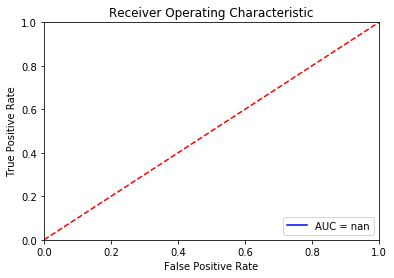

In [0]:
# ROC Curve
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(feature_matrix_TRAIN, train_Labels2) 
predictions = rfc.predict(feature_matrix_TEST) 

fpr, tpr, threshold = metrics.roc_curve(test_Labels2, predictions)
roc_auc = metrics.auc(fpr, tpr)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Save MODELs and Tokenization Files

In [0]:
w2v_model.save(DATASETS_FOLDER + "w2v_model2018.model")
# print(list(model.wv.vocab))